In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Assignment2_2025_Data.txt', sep=' ', header=None)

In [2]:
# Dictionary to map current column indices to new readable names
column_names = {
    0: 'LakeName',           # Lake or pond name
    1: 'MercuryLevel',       # Mercury level, response variable
    2: 'NumFishSampled',     # Number of fish in the composite (i.e., sampled)
    3: 'Elevation',          # Elevation (feet)
    4: 'SurfaceArea',        # Surface area (acres)
    5: 'MaxDepth',           # Maximum depth (feet)
    6: 'LakeType',           # Lake type: 1 = Oligotrophic, 2 = Mesotrophic, 3 = Eutrophic
    7: 'TempStratification', # Temperature stratification: 1 = Stratified, 0 = Non-stratified
    8: 'DrainageArea',       # Drainage area (square miles)
    9: 'RunoffFactor',       # Runoff Factor
    10: 'FlushingRate',      # Flushing rate
    11: 'DamPresence',       # Dam presence: 0 = no functional dam present, 1 = some man-made flowage in the drainage area
    12: 'LatitudeDegrees',   # Latitude degrees
    13: 'LatitudeMinutes',   # Latitude minutes
    14: 'LatitudeSeconds',   # Latitude seconds
    15: 'LongitudeDegrees',  # Longitude degrees
    16: 'LongitudeMinutes',  # Longitude minutes
    17: 'LongitudeSeconds'   # Longitude seconds
}

# Rename the columns
df.rename(columns=column_names, inplace=True)

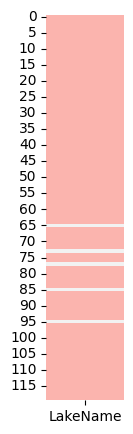

In [3]:
# check if there are duplicate in the first column
duplicates = df.duplicated(subset='LakeName')

# visualize the duplicates
plt.figure(figsize=(1, 5))
sns.heatmap(pd.DataFrame({'LakeName':duplicates}), cbar=False, cmap='Pastel1')

# append '2' to the LakeName of these duplicates
df.loc[duplicates, 'LakeName'] = df.loc[duplicates, 'LakeName'] + '_2'

In [ ]:
# EDA
# 1. show the pattern of missing values, using a heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='Pastel1', linewidths=0.5)
plt.title('Missing Values Heatmap')
plt.show() 

In [ ]:
# check data types
df.dtypes

In [4]:
df.set_index('LakeName', verify_integrity=True, inplace=True)

In [5]:
df['LakeType'] = df.LakeType.map(lambda x: {1.0: 'Oligo', 2.0: 'Meso', 3.0: 'Eu'}.get(x, 'Unknown'))
df['TempStratification'] = df.TempStratification.map(lambda x: {0.0: 'No', 1.0: 'Yes'}.get(x, 'Unknown'))
df['DamPresence'] = df.DamPresence.map(lambda x: {0.0: 'No', 1.0: 'Yes'}.get(x, 'Unknown'))

In [8]:
# create subplots with multiple histograms
# 'fig', the figure object, 
# is essentially the entire window that contains all the plot elements
# 'axes' is a single plot or graph within the figure

categorical_cols = ['LakeType', 'TempStratification', 'DamPresence']
numerical_cols = [i for i in df.columns if i not in categorical_cols]

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for i, column in enumerate(df.columns):
    if column in categorical_cols:
        sns.countplot(data=df, x=column, ax=axes[i//5, i%5])
    else:
        sns.histplot(df[column], kde=True, ax=axes[i//5, i%5])
for j in range(i + 1, 25):
    fig.delaxes(axes[j//5, j%5])  #delete empty subplots

plt.tight_layout()
plt.show()

The response variable is right-skewed.

##### To answer the first question: 
The U.S. FDA considers levels above 1.0 ppm to be unsafe. Many states use 0.5 ppm as a threshold to issue a warning; Maine uses 0.43 ppm. Does the data suggest that mercury levels at lakes in Maine are high enough to be of concern?

In [ ]:
# add more ticks to the x-axis
g = sns.histplot(df['MercuryLevel'], kde=True, bins=50)

ticklabels = [0, 0.43, 0.8, 1.2, 1.6, 2.0, 2.4]
g.set_xticks(ticklabels)    #Set the tick positions to match the data values
g.set_xticklabels(ticklabels)   #Set the tick labels

In [ ]:
count = sum(df['MercuryLevel'] >0.43) 
print(count)
count / len(df['MercuryLevel'])

Among 120 lakes, 45% of them have a Mercury level above 0.43 ppm which is considered unsafe in Maine. Thus the pollution in these lakes should be a concern.

##### The second & the third question:
Environmentalists are concerned that high mercury levels in fish may be related the presence of a **dam** or other human infrastructure that controls water flow. Does the data support this claim?

Past research has suggested that **oligotrophic** lake have the **highest** mercury levels and **eutrophic** lakes have the **lowest** mercury levels (e.g., Nilsson & Håkanson, 1992; Larsson et al., 1992). Does the data support this claim that mercury level may vary by lake type?


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.boxplot(data=df,  x='DamPresence', y='MercuryLevel',
            orient='v', palette='Set1', ax=axes[0])
sns.boxplot(data=df,  x='LakeType', y='MercuryLevel',
            orient='v', palette='Set1', ax=axes[1])
sns.boxplot(data=df,  x='TempStratification', y='MercuryLevel',
            orient='v', palette='Set1', ax=axes[2])

# Remove y-axis labels and ticks
axes[1].set(ylabel=None)
axes[1].set_yticklabels([])
axes[1].tick_params(left=False)
axes[2].set(ylabel=None)
axes[2].set_yticklabels([])
axes[2].tick_params(left=False)

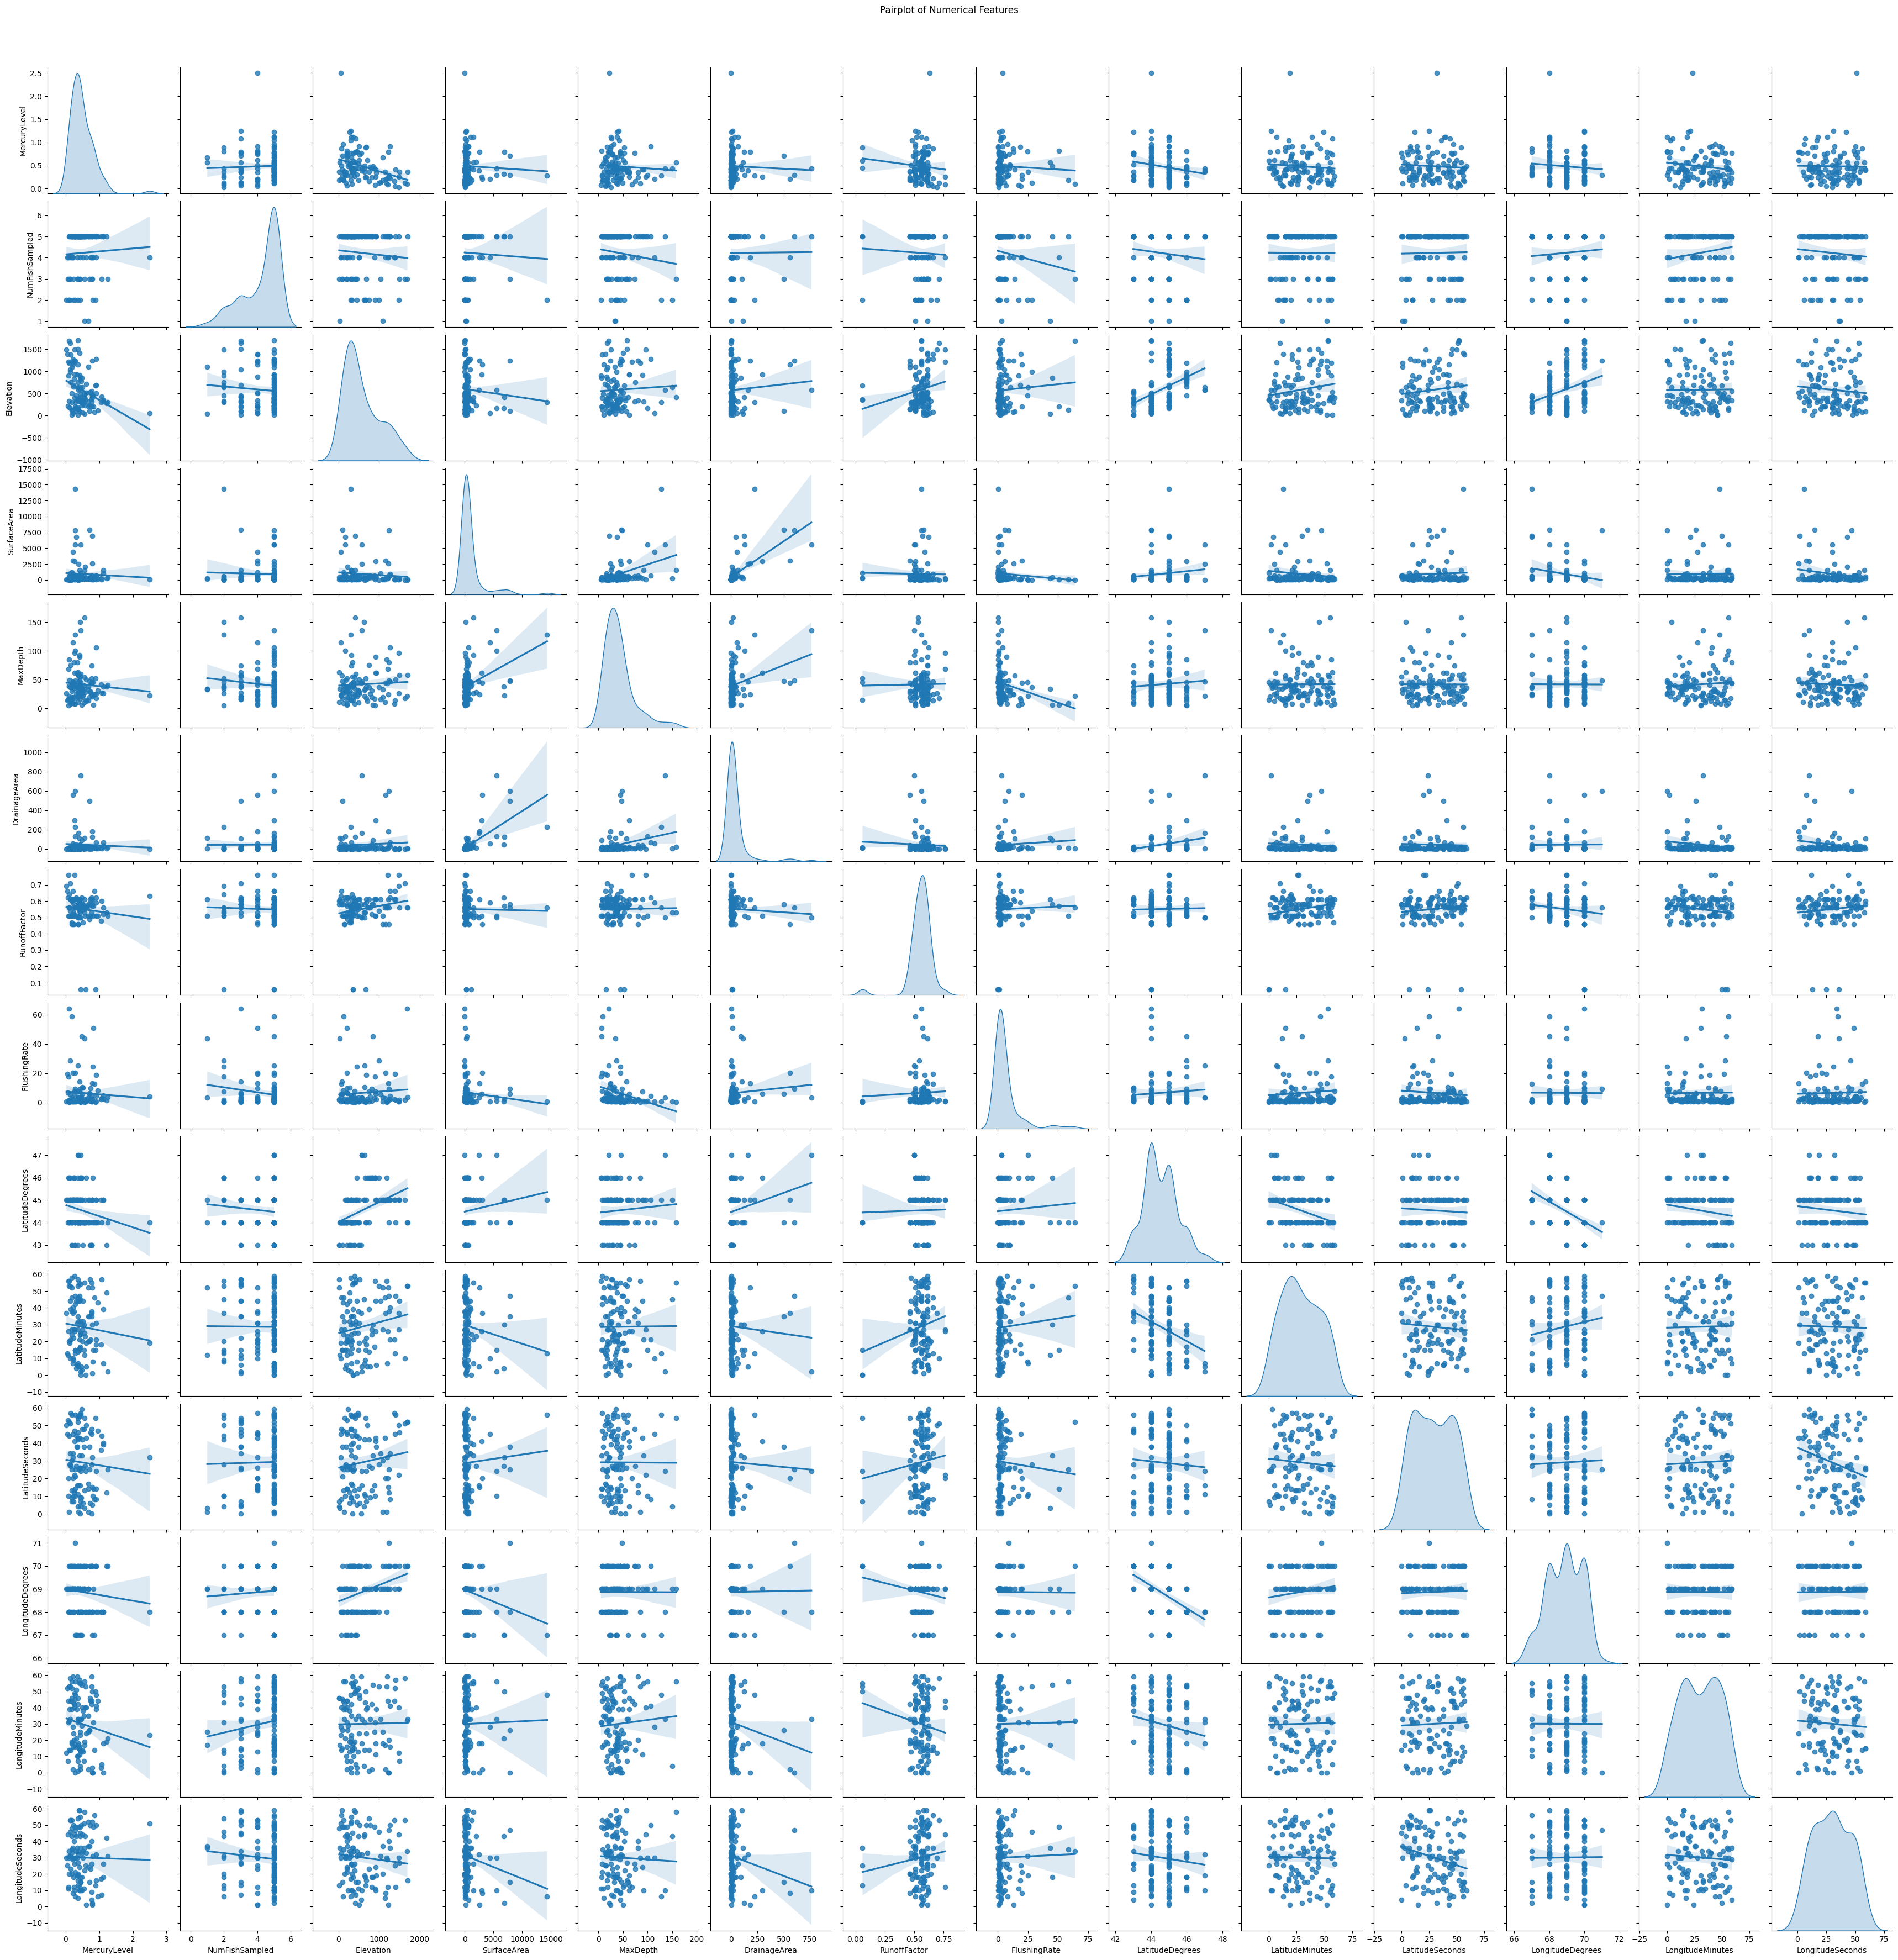

In [10]:
sns.pairplot(df.loc[:, numerical_cols], kind='reg', diag_kind='kde')
# add a super title
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [ ]:
#sns.pairplot(df.loc[:, numerical_cols[:-6]], kind='reg', diag_kind='kde')
# add a super title
plt.suptitle('Pairplot of Numerical Features, exluding last 6', y=1.02)
plt.show()

In [ ]:
# create a correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()